<div style="background-color:#B92B27; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>Quora Insincere Questions Classification 🕵️‍🤔</b></h1>
</div>

<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://qph.cf2.quoracdn.net/main-qimg-6d5ac06d4edd43922923f2ca9bed0223" alt="Animated GIF">
</div>

<div style="background-color:#B92B27; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [2]:
df_train = pd.read_csv("/kaggle/input/quora-insincere-questions-classification/train.csv")
df_test  = pd.read_csv("/kaggle/input/quora-insincere-questions-classification/test.csv")

In [3]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
df_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


<div style="background-color:#B92B27; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>DATA PREPROCESSING AND EDA</b></h2>
</div>

In [5]:
df_train.shape,df_test.shape

((1306122, 3), (375806, 2))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [8]:
df_train["target"].value_counts()

target
0    1225312
1      80810
Name: count, dtype: int64

In [9]:
insincere = df_train[df_train["target"] == 1]
sincere   = df_train[df_train["target"] == 0]

In [10]:
sincere.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [11]:
insincere.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


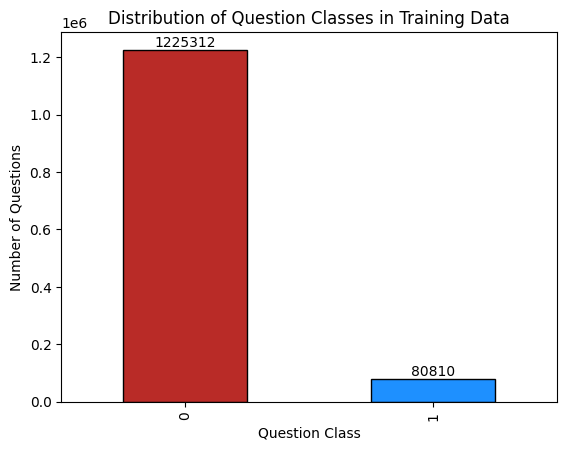

In [12]:
question_class = df_train["target"].value_counts()
colors = ["#B92B27", "dodgerblue"]
question_class.plot(kind="bar", color=colors, edgecolor="black")
plt.xlabel("Question Class")
plt.ylabel("Number of Questions")
plt.title("Distribution of Question Classes in Training Data")
for i, count in enumerate(question_class):
    plt.text(i, count + 0.1, str(count), ha="center", va="bottom")
plt.show()

In [13]:
print(df_train["target"].value_counts())
print(sum(df_train["target"] == 1) / sum(df_train["target"] == 0) * 100, "percent of questions are insincere.")
print(100 - sum(df_train["target"] == 1) / sum(df_train["target"] == 0) * 100, "percent of questions are sincere")

target
0    1225312
1      80810
Name: count, dtype: int64
6.595054973753624 percent of questions are insincere.
93.40494502624638 percent of questions are sincere


In [14]:
print("Original Class Distribution:")
print(df_train["target"].value_counts())

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df_train.drop("target", axis=1), df_train["target"])

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("\nBalanced Class Distribution:")
print(df_balanced["target"].value_counts())

insincere_percent = sum(df_balanced["target"] == 1) / len(df_balanced) * 100
sincere_percent = 100 - insincere_percent

print(f"\n{insincere_percent:.2f}% of questions are insincere.")
print(f"{sincere_percent:.2f}% of questions are sincere.")


Original Class Distribution:
target
0    1225312
1      80810
Name: count, dtype: int64

Balanced Class Distribution:
target
0    80810
1    80810
Name: count, dtype: int64

50.00% of questions are insincere.
50.00% of questions are sincere.


In [15]:
df_train = df_balanced.copy()
df_train.shape

(161620, 3)

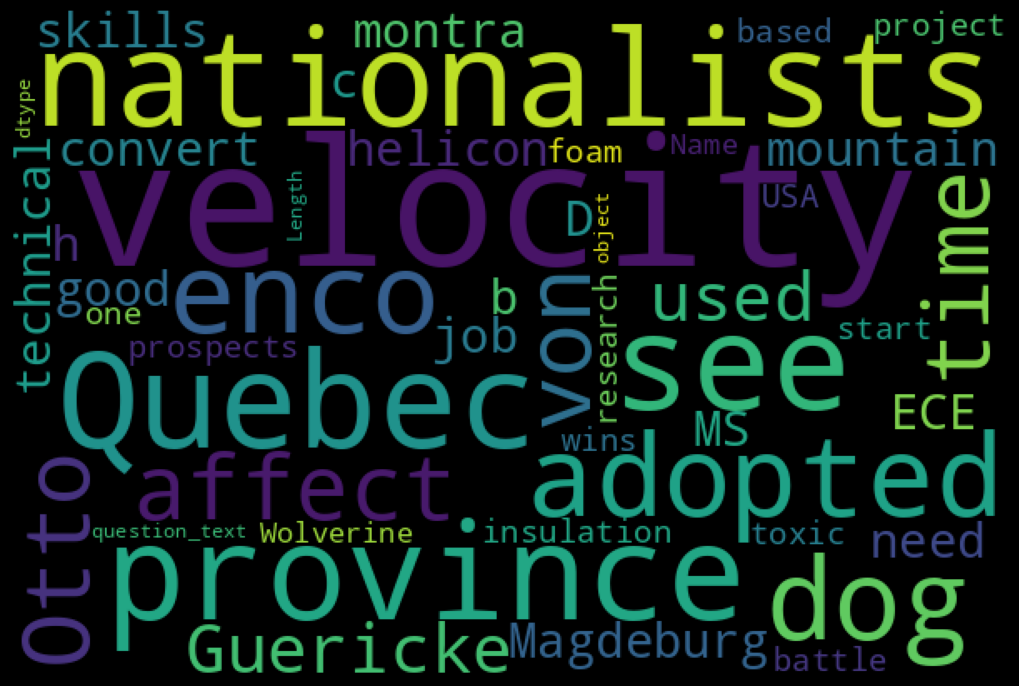

In [16]:
stopwords = set(STOPWORDS)
sincere_wordcloud = WordCloud(width=600, height=400).generate(str(sincere["question_text"]))
plt.figure(figsize=(10,8), facecolor="black")
plt.imshow(sincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

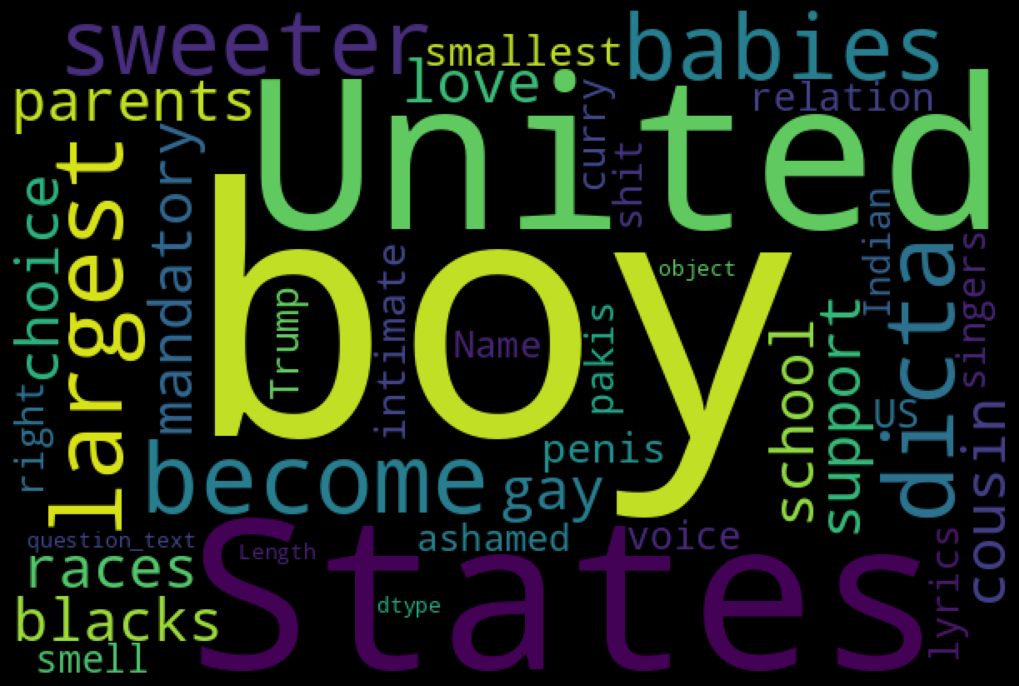

In [17]:
stopwords = set(STOPWORDS)
insincere_wordcloud = WordCloud(width=600, height=400).generate(str(insincere["question_text"]))
plt.figure(figsize=(10,8), facecolor="black")
plt.imshow(insincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

In [18]:
df_train["number_words"] = df_train["question_text"].apply(lambda x: len(x.split()))
df_test["number_words"]  = df_test["question_text"].apply(lambda x: len(x.split()))

In [19]:
df_train["num_unique_words"] = df_train["question_text"].apply(lambda x: len(set(str(x).split())))
df_test["num_unique_words"]  = df_test["question_text"].apply(lambda x: len(set(str(x).split())))

In [20]:
df_train["num_chars"] = df_train["question_text"].apply(lambda x: len(str(x)))
df_test["num_chars"]  = df_test["question_text"].apply(lambda x: len(str(x)))

In [21]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
df_train["num_stopwords"] = df_train["question_text"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))
df_test["num_stopwords"]  = df_test["question_text"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [22]:
df_train["num_punctuation"] = df_train["question_text"].apply(lambda x : len([np for np in str(x) if np in punctuation]))
df_test["num_punctuation"]  = df_test["question_text"].apply(lambda x : len([np for np in str(x) if np in punctuation]))

In [23]:
df_train["num_uppercase"] = df_train["question_text"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))
df_test["num_uppercase"]  = df_test["question_text"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))

In [24]:
df_train["num_lowercase"] = df_train["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))
df_test["num_lowercase"]  = df_test["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))

In [25]:
df_train["num_title"] = df_train["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.istitle()]))
df_test["num_title"]  = df_test["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.istitle()]))

In [26]:
df_train[df_train["target"] == 1].describe()

,target,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title
count,80810.0,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000
mean,1.0,17.277812,16.037594,98.064163,8.000829,2.369905,0.326284,13.919453,2.962826
std,0.0,9.568309,8.153619,55.186227,4.918845,2.906119,0.896822,8.661324,1.971440
min,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,10.000000,55.000000,4.000000,1.000000,0.000000,7.000000,2.000000
50%,1.0,15.000000,14.000000,86.000000,7.000000,2.000000,0.000000,12.000000,3.000000
75%,1.0,23.000000,21.000000,130.000000,11.000000,3.000000,0.000000,19.000000,4.000000
max,1.0,64.000000,48.000000,1017.000000,37.000000,411.000000,37.000000,56.000000,37.000000


In [27]:
df_train[df_train["target"] == 0].describe()

,target,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title
count,80810.0,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000
mean,0.0,12.501609,11.876104,68.821643,6.035132,1.705779,0.462542,10.017188,2.072380
std,0.0,6.727994,5.761206,36.553370,3.600207,1.564554,0.850761,6.145395,1.445841
min,0.0,2.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,8.000000,8.000000,44.000000,4.000000,1.000000,0.000000,6.000000,1.000000
50%,0.0,11.000000,10.000000,59.000000,5.000000,1.000000,0.000000,8.000000,2.000000
75%,0.0,15.000000,14.000000,82.000000,7.000000,2.000000,1.000000,12.000000,3.000000
max,0.0,56.000000,47.000000,263.000000,37.000000,96.000000,16.000000,51.000000,21.000000


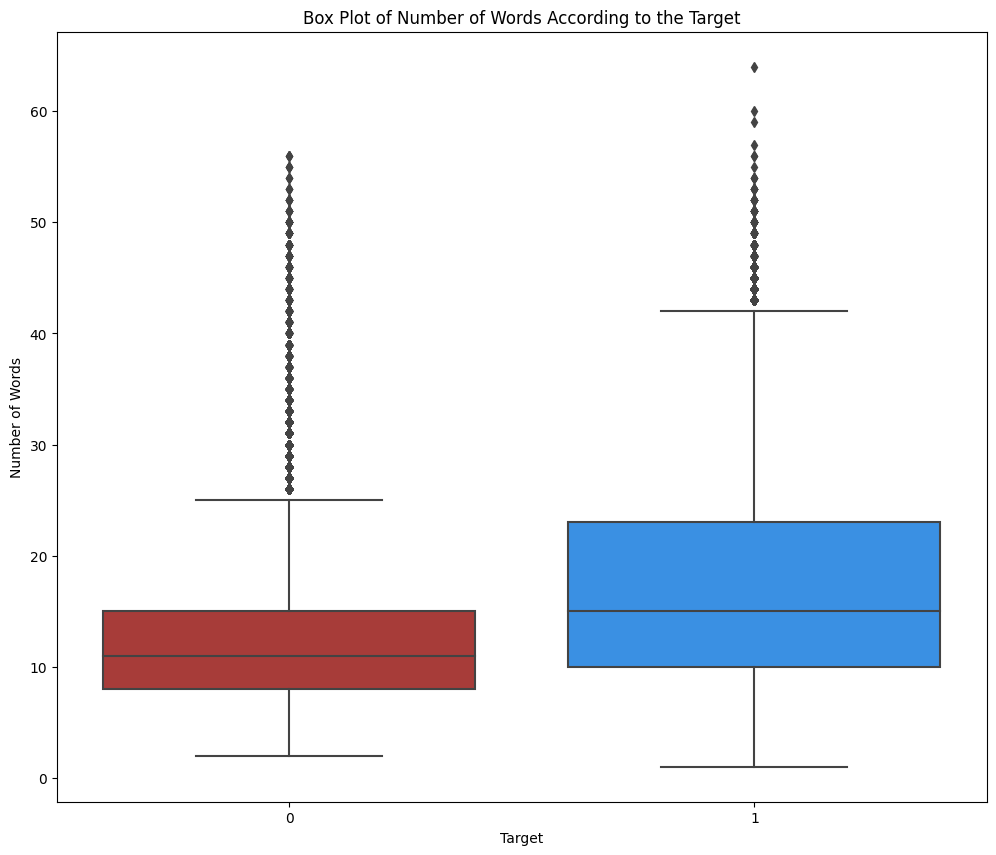

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="number_words", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of Words", title="Box Plot of Number of Words According to the Target")
plt.show()

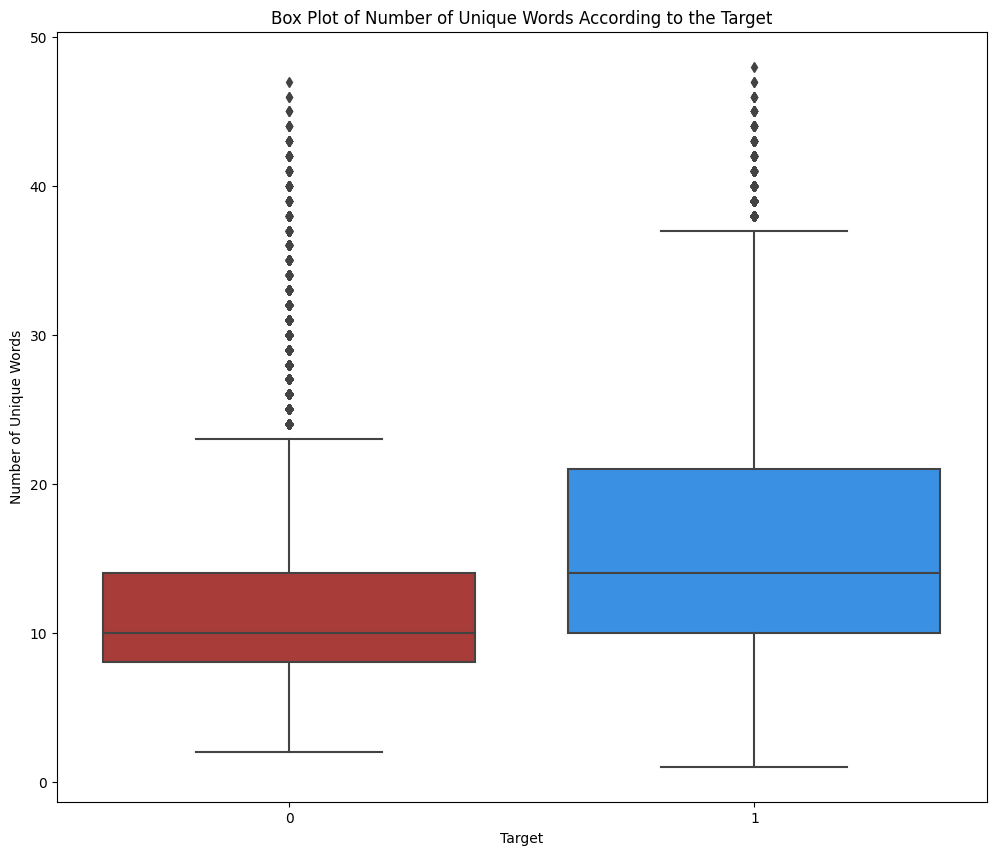

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="num_unique_words", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of Unique Words", title="Box Plot of Number of Unique Words According to the Target")
plt.show()

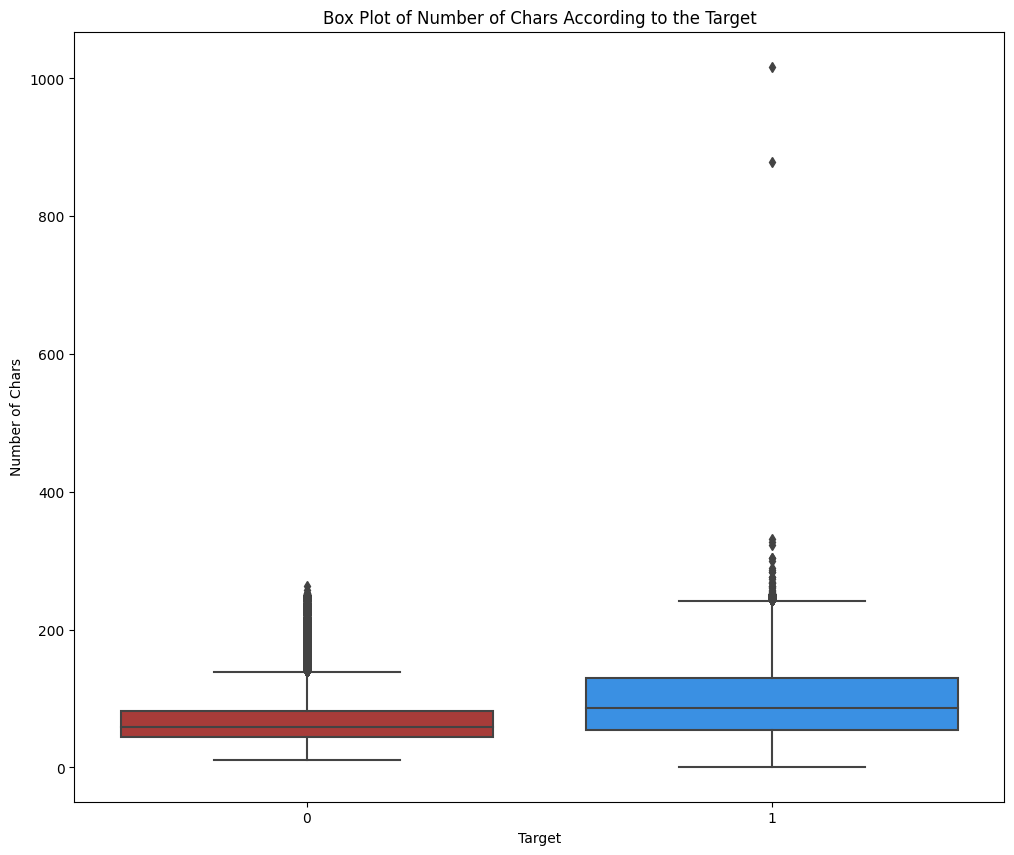

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="num_chars", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of Chars", title="Box Plot of Number of Chars According to the Target")
plt.show()

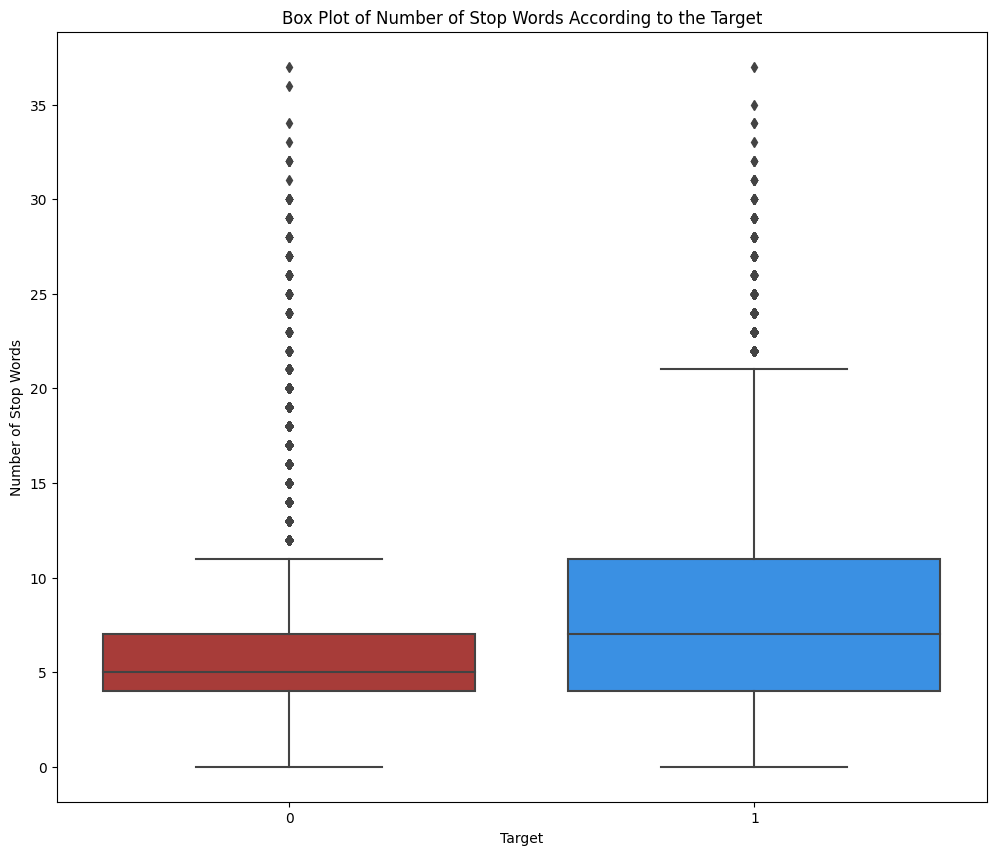

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="num_stopwords", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of Stop Words", title="Box Plot of Number of Stop Words According to the Target")
plt.show()

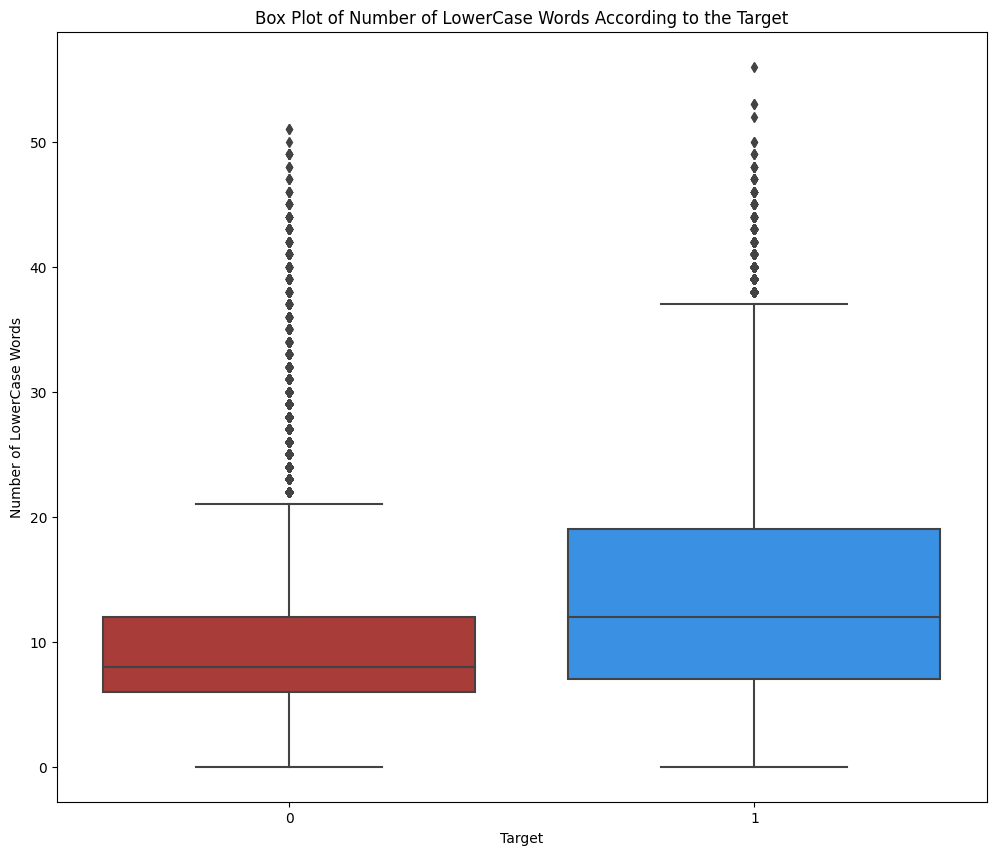

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="num_lowercase", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of LowerCase Words", title="Box Plot of Number of LowerCase Words According to the Target")
plt.show()

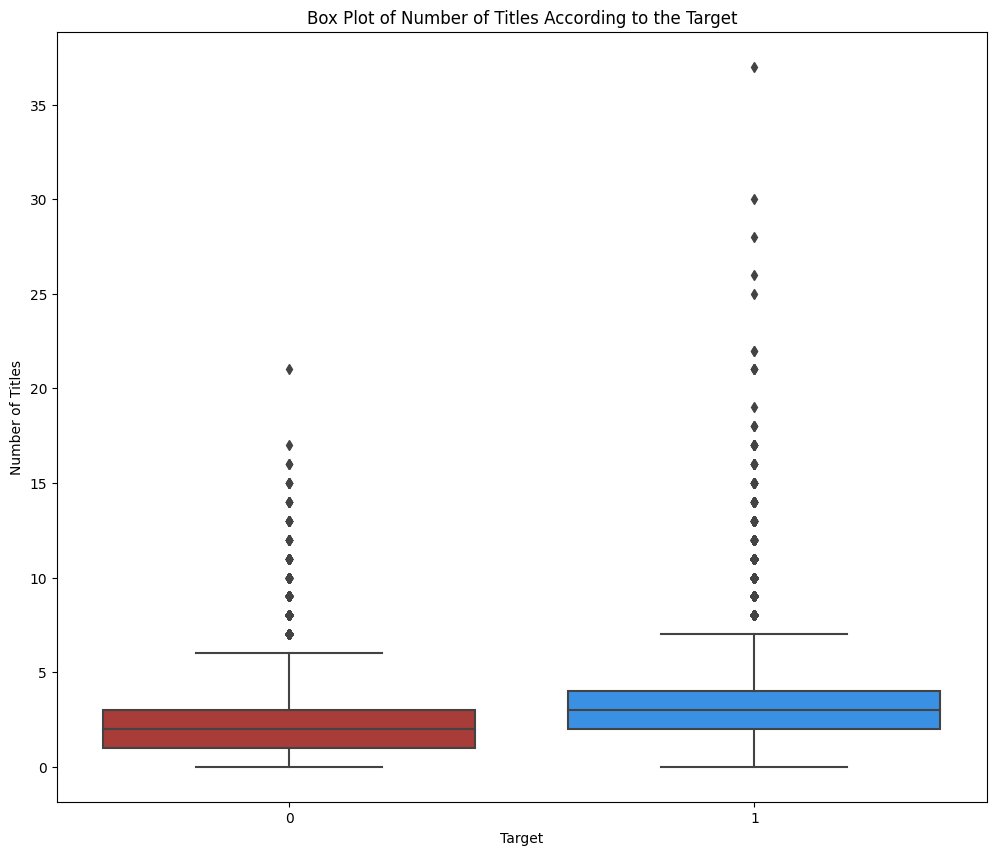

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["#B92B27", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(data=df_train, y="num_title", x="target", orient="v", ax=ax)
ax.set(xlabel="Target", ylabel="Number of Titles", title="Box Plot of Number of Titles According to the Target")
plt.show()

In [34]:
def text_process(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text

In [35]:
df_train['clean_train'] = df_train["question_text"].apply(text_process)
df_train.head()

,qid,question_text,target,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title,clean_train
1022714,c86ab618f85e9b7fc374,Is sadism a coping mechanism for people who ar...,0,16,16,94,8,1,0,15,1,sadism coping mechanism people extremely affec...
641364,7d9ea6d66b8866e69240,Is it possible for me as a soul to go outside ...,0,18,18,84,11,1,0,17,1,possible soul go outside body observe universe
1225111,f01982d0cd06aba308ed,Do Pet Animal Rescue workers minimize shows of...,0,23,23,143,10,2,0,19,4,pet animal rescue workers minimize shows affec...
1130433,dd8a6b5452a407cea2ac,How do you identify a sonnet and what can we i...,0,15,14,71,11,1,0,14,1,identify sonnet infer suggest
1220402,ef30e73bf0a81a06ccf6,Is there a special place in hell for the likes...,0,13,13,63,7,1,0,10,3,special place hell likes genghiz khan


In [36]:
df_test['clean_test'] = df_test["question_text"].apply(text_process)
df_test

,qid,question_text,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title,clean_test
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,11,1,0,20,1,many women become rude arrogant get little bit...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,17,2,6,22,5,apply rv college engineering bms college engin...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,6,1,0,9,1,really like nurse practitioner
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,2,1,0,2,1,entrepreneurs
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,1,1,0,6,1,education really making good people nowadays
...,...,...,...,...,...,...,...,...,...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...,9,8,50,3,1,0,8,1,many countries listed gold import indua
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...,9,9,53,5,1,0,8,1,alternative dresses formal parties
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...,9,9,50,4,1,1,6,3,find best friendship quotes telugu
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?,8,7,43,5,1,0,7,1,causes refraction light


In [37]:
X_train,X_val,Y_train,Y_val = train_test_split(df_train['clean_train'],df_train['target'],test_size=0.2)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((129296,), (32324,), (129296,), (32324,))

<div style="background-color:#B92B27; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>MODEL ENGINEERING</b></h2>
</div>

In [38]:
pipeline = Pipeline(
    [
        ("cv",CountVectorizer(analyzer="word",ngram_range=(1,4),max_df=0.9)),
        ("clf",LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1))
    ]
)

In [39]:
lr_model = pipeline.fit(X_train,Y_train)

Epoch 1, change: 1.00000000
Epoch 2, change: 0.17566596
Epoch 3, change: 0.12221242
Epoch 4, change: 0.07905928
Epoch 5, change: 0.06195832
Epoch 6, change: 0.04770218
Epoch 7, change: 0.03534061
Epoch 8, change: 0.03265819
Epoch 9, change: 0.02774290
Epoch 10, change: 0.02337845
Epoch 11, change: 0.01941793
Epoch 12, change: 0.01772424
Epoch 13, change: 0.01627929
Epoch 14, change: 0.01479469
Epoch 15, change: 0.01388232
Epoch 16, change: 0.01287814
Epoch 17, change: 0.01202953
Epoch 18, change: 0.01131062
Epoch 19, change: 0.01050889
Epoch 20, change: 0.01005786
Epoch 21, change: 0.00926815
Epoch 22, change: 0.00862255
Epoch 23, change: 0.00794651
Epoch 24, change: 0.00768462
Epoch 25, change: 0.00726182
Epoch 26, change: 0.00663845
Epoch 27, change: 0.00626439
Epoch 28, change: 0.00580173
Epoch 29, change: 0.00555010
Epoch 30, change: 0.00519861
Epoch 31, change: 0.00497262
Epoch 32, change: 0.00470031
Epoch 33, change: 0.00436874
Epoch 34, change: 0.00416791
Epoch 35, change: 0.003

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     16057
           1       0.90      0.85      0.88     16267

    accuracy                           0.88     32324
   macro avg       0.88      0.88      0.88     32324
weighted avg       0.88      0.88      0.88     32324



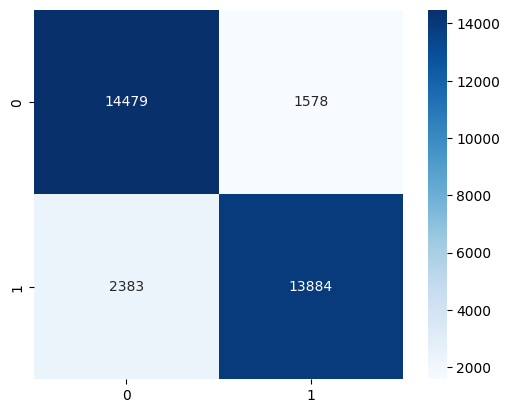

In [40]:
Y_pred = lr_model.predict(X_val)
print(classification_report(Y_val,Y_pred))
cm     = confusion_matrix(Y_val,Y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, square=True, fmt=".0f");

In [41]:
y_pred_final = pipeline.predict(df_test['clean_test'])
y_pred_final

array([1, 0, 0, ..., 0, 0, 1])

In [42]:
df_sub = pd.DataFrame({"qid":df_test["qid"], "prediction":y_pred_final})
df_sub.to_csv('submission.csv', index=False)
df_sub.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
